# Exploratory Data Analysis and Data Preparation


# About the Data

The Song attributes data is a dataset about the songs and their attributes such as Danceability, Energy, Tempo and other relating factors.
The dataset is  plotted onto different kinds of plots to determine patterns in the data in relation to the popularity.
The data set contains 154931 observations of songs. There are 13 columns of the atrributes. 3 columns correspond to the identifiers of the songs, such as  Artist and Album. 2 of the columns denote the popularity. We have derived PopularityLabel (Target variable) based on the values from Popularity.

# Importing necessary libraries

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Load the dataset

In [2]:
#Load the dataset
song_data = pd.read_csv('https://raw.githubusercontent.com/yashapatel131/KDD_GroupProject/main/Datasets/Song_Attributes.csv')

# Summary Statistics

In [3]:
#Provides the number of rows and columns in a dataset
print(song_data.shape)

(154931, 19)


In [4]:
#Preliminary exploration, print and visualize first and last 5  records in the dataset
#Prints the top 5 rows of the dataset
song_data.head()

,ID,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,popularityLabel,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,Popular,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,Popular,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,Popular,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,Popular,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,Popular,0.0318,92.721,4,0.666


In [5]:
#Prints the bottom 5 rows of the dataset
song_data.tail()

,ID,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,popularityLabel,Speechiness,Tempo,TimeSignature,Valence
154926,114,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,Popular,0.2190,88.011,4,0.840
154927,115,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Dont Want Your Money (feat. H.E.R.),74,Popular,0.0853,91.418,4,0.763
154928,116,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,Popular,0.2700,97.995,4,0.515
154929,117,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,Popular,0.1590,170.125,4,0.430
154930,118,0.000245,No.6 Collaborations Project,Ed Sheeran,0.631,209120,0.796,False,0.011500,0.3800,-5.350,1,BLOW (with Chris Stapleton & Bruno Mars),72,Popular,0.0401,92.469,4,0.596


In [6]:
#To obtain the information on the attributes of the dataset
#The following command gives metadata of the dataset
print (song_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                154931 non-null  int64  
 1   Acousticness      154931 non-null  float64
 2   Album             154931 non-null  object 
 3   Artist            154931 non-null  object 
 4   Danceability      154931 non-null  float64
 5   Duration          154931 non-null  int64  
 6   Energy            154931 non-null  float64
 7   Explicit          154931 non-null  bool   
 8   Instrumentalness  154931 non-null  float64
 9   Liveness          154931 non-null  float64
 10  Loudness          154931 non-null  float64
 11  Mode              154931 non-null  int64  
 12  Name              154931 non-null  object 
 13  Popularity        154931 non-null  int64  
 14  popularityLabel   154931 non-null  object 
 15  Speechiness       154931 non-null  float64
 16  Tempo             15

In [7]:
#To find the statistical summary of the dataset
#Gives the record count, average value, standard deviation, minimum and maximum value, data distribution in each quantile for each column
print(song_data.describe())

                  ID   Acousticness  ...  TimeSignature        Valence
count  154931.000000  154931.000000  ...  154931.000000  154931.000000
mean      168.999303       0.266328  ...       3.904274       0.498472
std       226.671206       0.300508  ...       0.467765       0.240366
min         0.000000       0.000000  ...       0.000000       0.000000
25%        39.000000       0.020200  ...       4.000000       0.309000
50%        91.000000       0.128000  ...       4.000000       0.498000
75%       197.000000       0.453000  ...       4.000000       0.688000
max      1796.000000       0.996000  ...       5.000000       0.995000

[8 rows x 14 columns]


In [8]:
#Check for nulls in the dataset and sum them
song_data.isnull().sum()
#It is observed that there are no nulls in the dataset.

ID                  0
Acousticness        0
Album               0
Artist              0
Danceability        0
Duration            0
Energy              0
Explicit            0
Instrumentalness    0
Liveness            0
Loudness            0
Mode                0
Name                0
Popularity          0
popularityLabel     0
Speechiness         0
Tempo               0
TimeSignature       0
Valence             0
dtype: int64

In [9]:
#Keeping only integer valued coloumns and target variable
song_data_values = song_data.drop(columns=['Album', 'Artist', 'Explicit', 'Name', 'ID'])
song_data_values.head()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Popularity,popularityLabel,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,0.520,234947,0.904,0.010300,0.0634,-5.030,1,35,Popular,0.0309,106.022,4,0.365
1,0.018200,0.581,239573,0.709,0.000664,0.1740,-4.909,1,31,Popular,0.0282,120.027,4,0.408
2,0.000473,0.572,198400,0.918,0.000431,0.0977,-3.324,0,30,Popular,0.0559,144.061,4,0.370
3,0.000970,0.596,231453,0.661,0.000033,0.1130,-5.051,1,35,Popular,0.0254,111.975,4,0.183
4,0.000036,0.520,222520,0.808,0.000010,0.0800,-4.553,0,21,Popular,0.0318,92.721,4,0.666


# Exploring the Categorical Variable

The categorical variable we are exploring is PopularityLabel. We see the class distribution (different labels and number in each label.)

In [10]:
#To view the distribution of PopularityLabel. Grouping by the popularityLabel
print(song_data.groupby('popularityLabel').size())

popularityLabel
Popular      67925
Unpopular    87006
dtype: int64


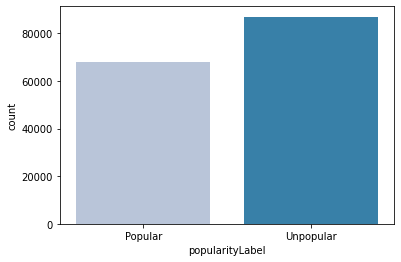

In [11]:
#Count Plot to display the number of observations for a categorical variable using bars
sns.countplot(x='popularityLabel', data=song_data, palette="PuBu")
#We can see that our target variable has a fairly reasonable split between popular and unpopular songs.

# Exploring Numeric Variables

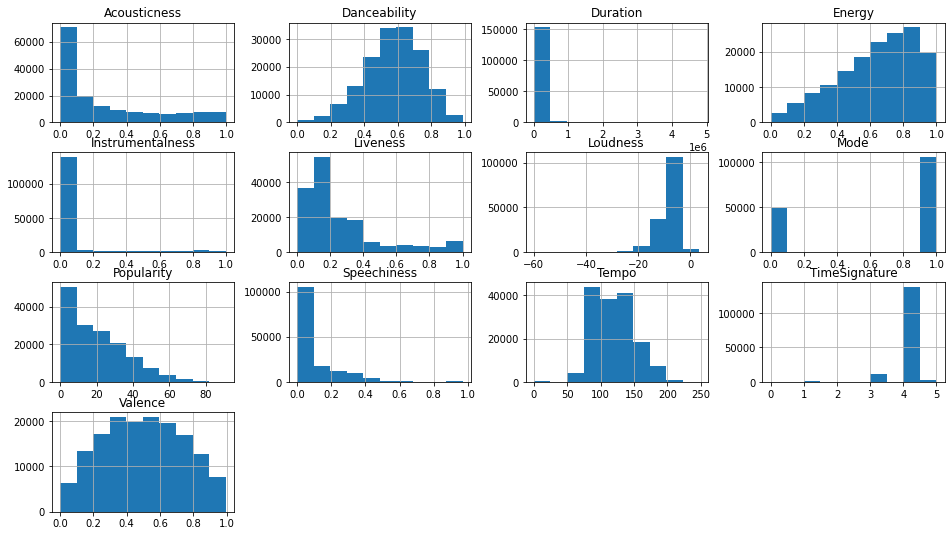

In [12]:
#The graphs shows how the data is distributed for every single attribute of the dataset
plt.rcParams["figure.figsize"] = [16,9]
song_data_values.hist()
plt.show()
#We see that the data for each attribute is not normally distributed. 
#Consider the graph for Acousticness, Speechiness, are left skewed and we could see some ouliers in the graph for Mode and Time Signature. Energy is right skewed.

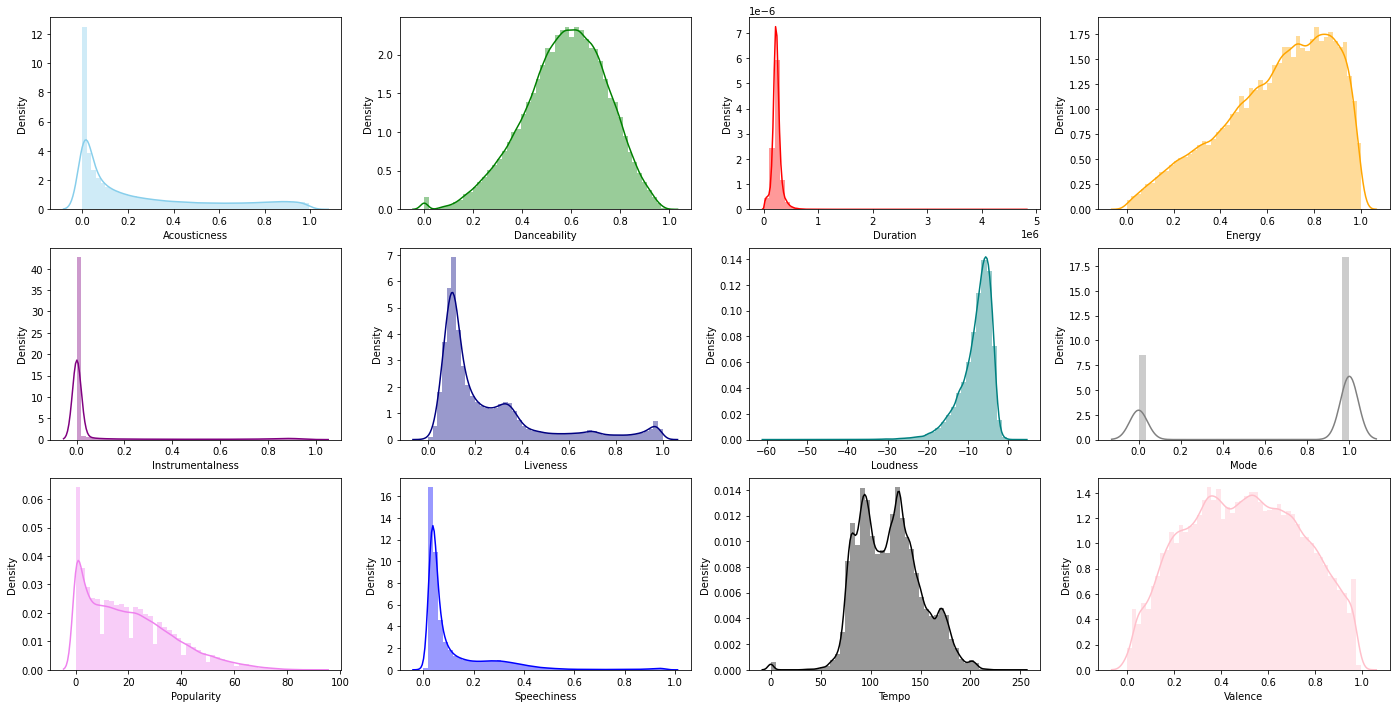

In [13]:
#Univariate plots to see individual distribution
f, axes = plt.subplots(3, 4, figsize=(24, 12))
sns.distplot( song_data_values['Acousticness'] , color="skyblue", ax=axes[0, 0])
sns.distplot( song_data_values['Danceability'] , color="green", ax=axes[0, 1])
sns.distplot( song_data_values['Duration'] , color="red", ax=axes[0, 2])
sns.distplot( song_data_values['Energy'] , color="orange", ax=axes[0, 3])
sns.distplot( song_data_values['Instrumentalness'] , color="purple", ax=axes[1, 0])
sns.distplot( song_data_values['Liveness'] , color="navy", ax=axes[1, 1])
sns.distplot( song_data_values['Loudness'] , color="teal", ax=axes[1, 2])
sns.distplot( song_data_values['Mode'] , color="grey", ax=axes[1, 3])
sns.distplot( song_data_values['Popularity'] , color="violet", ax=axes[2, 0])
sns.distplot( song_data_values['Speechiness'] , color="blue", ax=axes[2, 1])
sns.distplot( song_data_values['Tempo'] , color="black", ax=axes[2, 2])
sns.distplot( song_data_values['Valence'] , color="pink", ax=axes[2, 3])
#We looked at a number of distribution plots for all the different song attributes. 
#From these plots we can see that Danceability, Energy, Tempo, and Valence are almost normally distributed.
#The rest of the plots appear to be skewed.

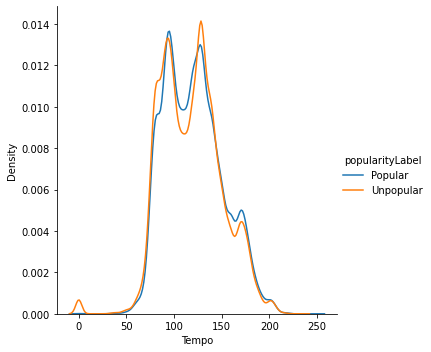

In [14]:
#Univariate relation to visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(song_data, hue="popularityLabel", size=5) \
    .map(sns.kdeplot, "Tempo") \
    .add_legend()
#We see the graph is evenly distributed.
#Most of the popular and unpopular songs are all located with a tempo with a median value, so this means the songs have a tempo which is not too fast or not too slow. 

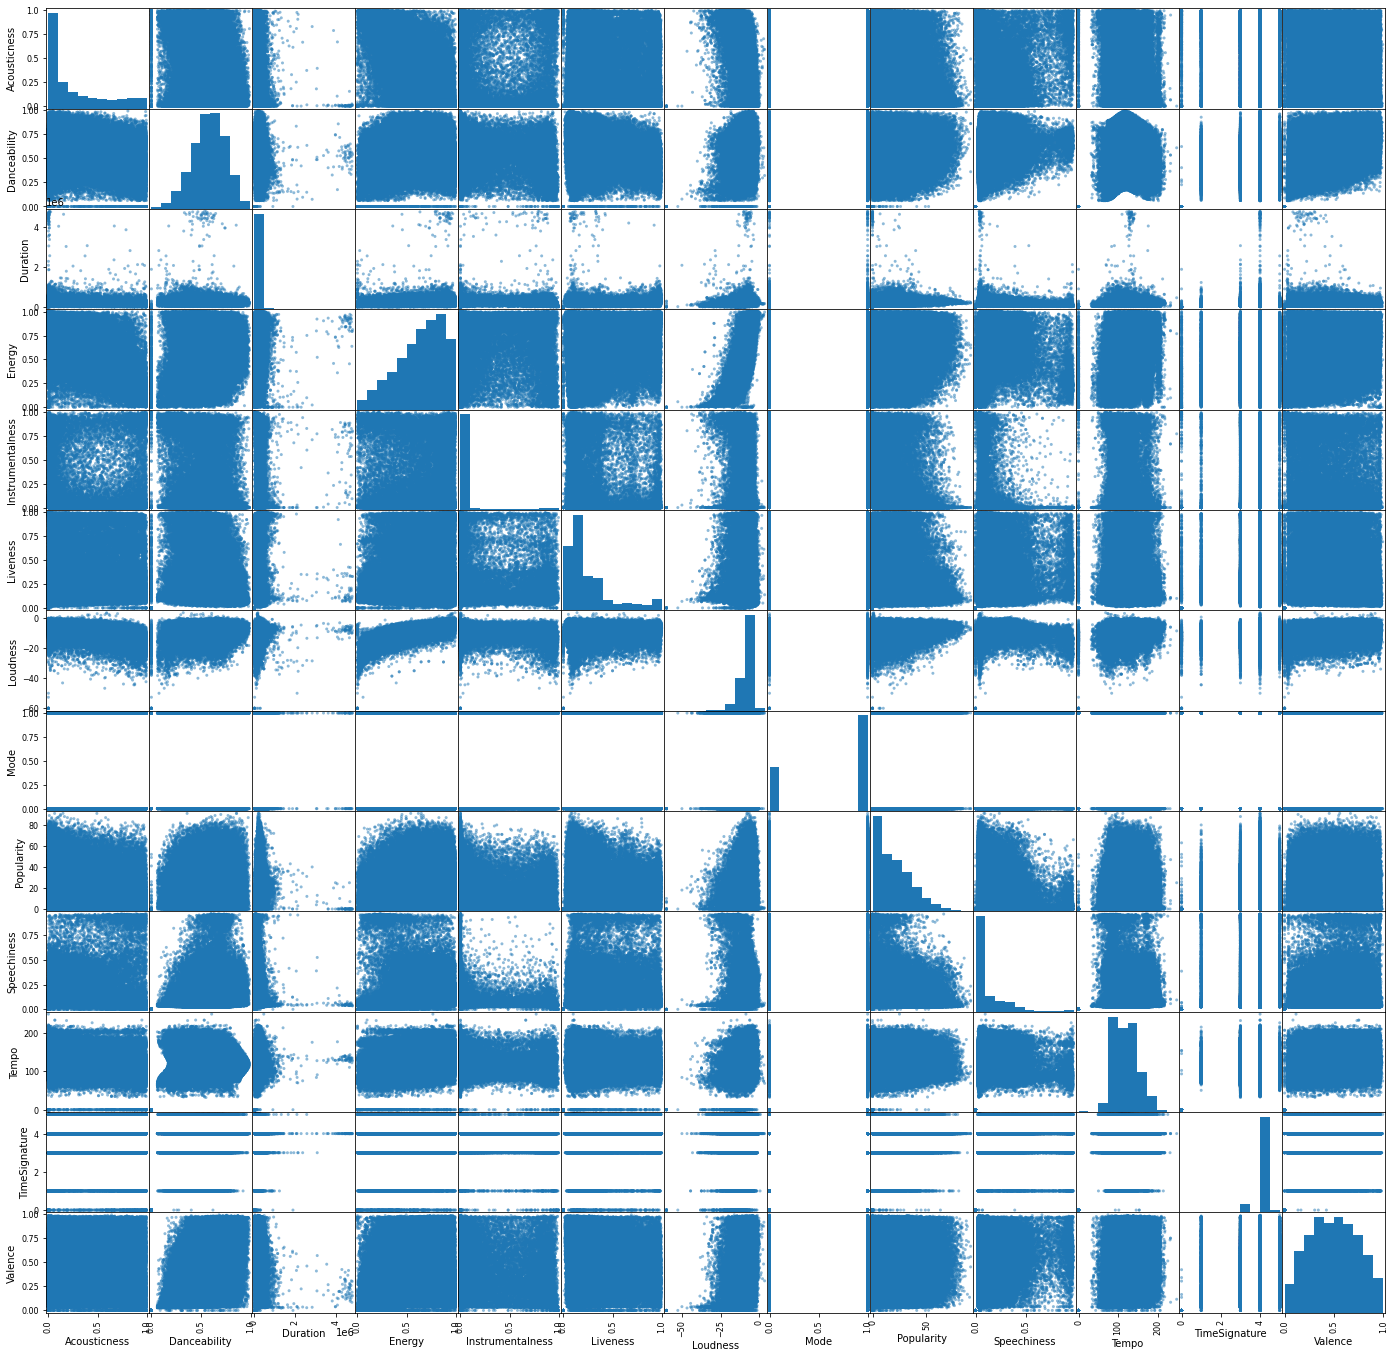

In [15]:
#Looking at possible multivariate associations of numeric variables using scatter plots
plt.rcParams["figure.figsize"] = (24,24)
scatter_matrix(song_data_values)
plt.show()
#Scatter matrix that shows us the association between all the different attributes.
#It is very hard to infer much from this plot since the dataset has a lot of records. 

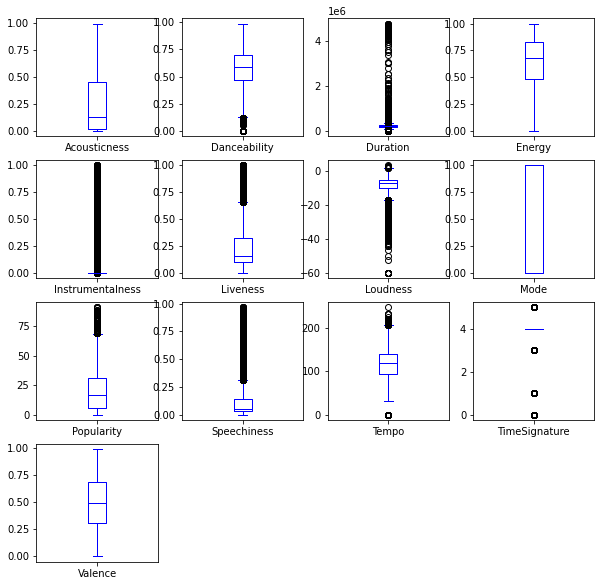

In [16]:
#Box and Whisker plots to show how the data is distributed for each attribute to get the summary of statistics graphically
plt.rcParams["figure.figsize"] = (10,10)
song_data_values.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, color = 'b')
plt.show()
#We see that the data is skewed a bit for most of the box plots but some of them are very evenly distributed such as the valence.
#The other are skewed due to the music having different variations within each attribute.

Text(0.5, 1.0, 'Valence')

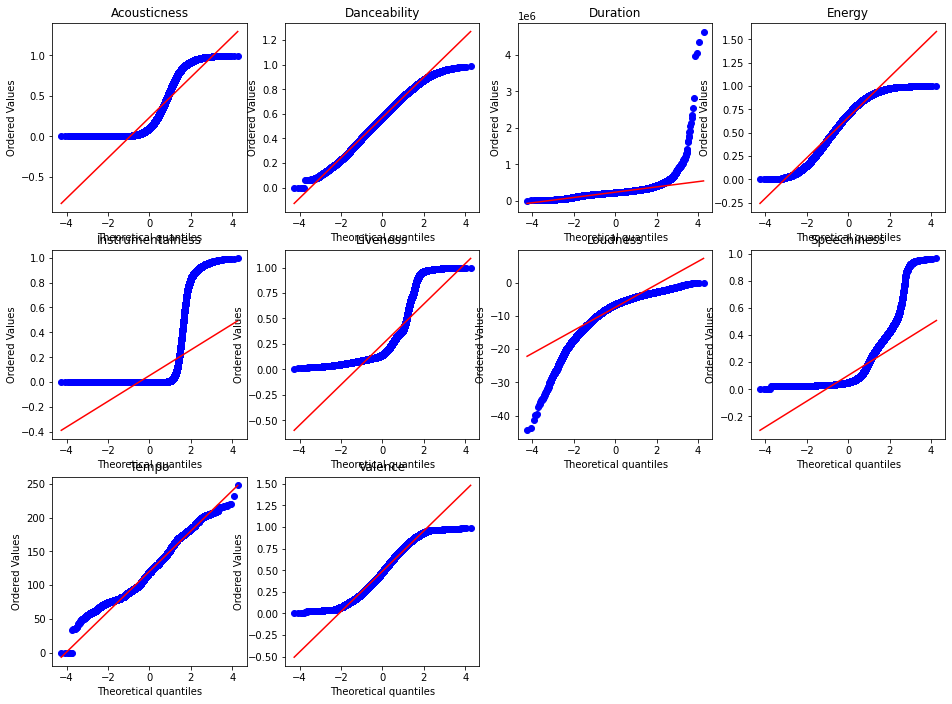

In [17]:
#To visualize normality using q-q plot for 'Popular' label
plt.rcParams["figure.figsize"] = (16,16)
song = song_data.query('popularityLabel== "Popular"')
stats.probplot(song['Acousticness'], dist = "norm", plot = plt.subplot(441))
plt.title("Acousticness")
stats.probplot(song['Danceability'], dist = "norm", plot = plt.subplot(442))
plt.title("Danceability")
stats.probplot(song['Duration'], dist = "norm", plot = plt.subplot(443))
plt.title("Duration")
stats.probplot(song['Energy'], dist = "norm", plot = plt.subplot(444))
plt.title("Energy")
stats.probplot(song['Instrumentalness'], dist = "norm", plot = plt.subplot(445))
plt.title("Instrumentalness")
stats.probplot(song['Liveness'], dist = "norm", plot = plt.subplot(446))
plt.title("Liveness")
stats.probplot(song['Loudness'], dist = "norm", plot = plt.subplot(447))
plt.title("Loudness")
stats.probplot(song['Speechiness'], dist = "norm", plot = plt.subplot(448))
plt.title("Speechiness")
stats.probplot(song['Tempo'], dist = "norm", plot = plt.subplot(449))
plt.title("Tempo")
stats.probplot(song['Valence'], dist = "norm", plot = plt.subplot(4,4,10))
plt.title("Valence")
#We see the 'Popular' songs have values for Tempo and Danceability are aligned with the red line meaning there is a good fit.
#For the rest of the attributes, we see multiple points are touching the line but not staying on the line as much.
#We also see that valence is very closely aligned as well.

Text(0.5, 1.0, 'Valence')

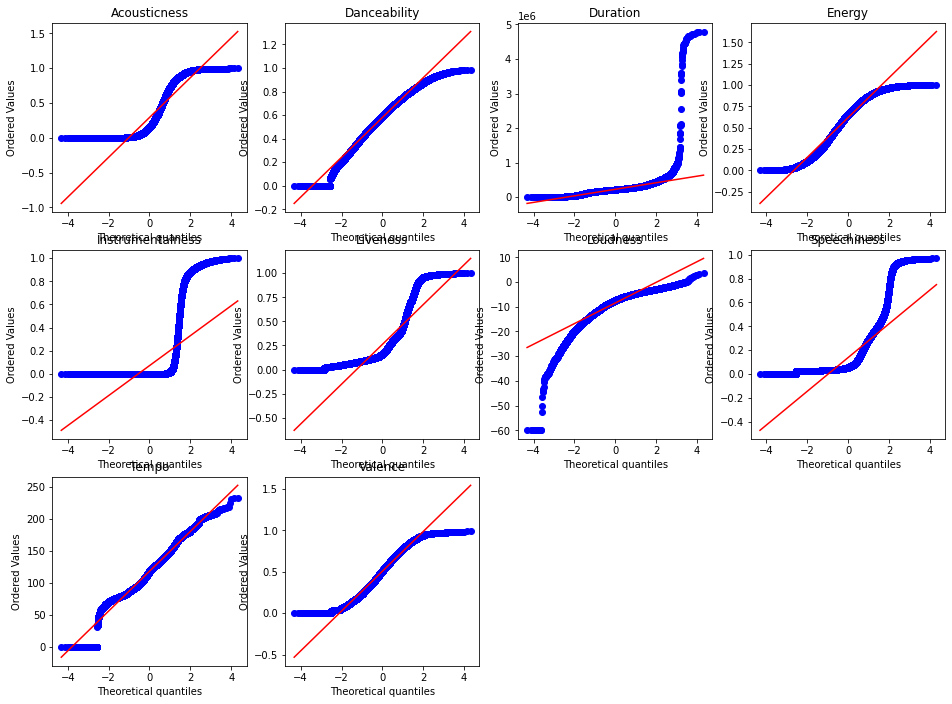

In [18]:
#To visualize normality using q-q plot for 'Unpopular' label
plt.rcParams["figure.figsize"] = (16,16)
song = song_data.query('popularityLabel== "Unpopular"')
stats.probplot(song['Acousticness'], dist = "norm", plot = plt.subplot(441))
plt.title("Acousticness")
stats.probplot(song['Danceability'], dist = "norm", plot = plt.subplot(442))
plt.title("Danceability")
stats.probplot(song['Duration'], dist = "norm", plot = plt.subplot(443))
plt.title("Duration")
stats.probplot(song['Energy'], dist = "norm", plot = plt.subplot(444))
plt.title("Energy")
stats.probplot(song['Instrumentalness'], dist = "norm", plot = plt.subplot(445))
plt.title("Instrumentalness")
stats.probplot(song['Liveness'], dist = "norm", plot = plt.subplot(446))
plt.title("Liveness")
stats.probplot(song['Loudness'], dist = "norm", plot = plt.subplot(447))
plt.title("Loudness")
stats.probplot(song['Speechiness'], dist = "norm", plot = plt.subplot(448))
plt.title("Speechiness")
stats.probplot(song['Tempo'], dist = "norm", plot = plt.subplot(449))
plt.title("Tempo")
stats.probplot(song['Valence'], dist = "norm", plot = plt.subplot(4,4,10))
plt.title("Valence")
#We see the probability plots for the 'Unpopular' songs is very similar to the popular songs probability plots from above.
#The Tempo and Danceability are both the most aligned with the red line, and we also see that Valence is very closely aligned.

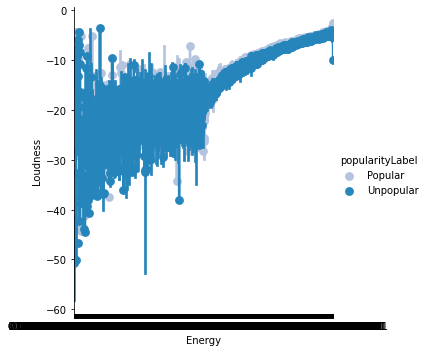

In [19]:
#The below plot gives an insight of characteristics of the attributes in combination with the PopularityLabel
sns.factorplot(x="Energy", y="Loudness", data=song_data_values, hue="popularityLabel", palette="PuBu")
#We see the comparison of Energy vs Loudness.
#We see loudness and energy are positively correlated. Higher the loudness, higher the energy, and vice versa.

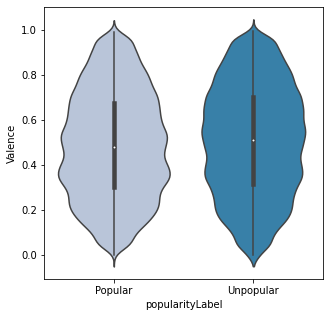

In [20]:
#Violin Plot for Valence to show the distribution of quantitative data across several levels of categorical variables
plt.figure(figsize=(5,5))
sns.violinplot(x="popularityLabel", y="Valence", data=song_data_values, palette="PuBu")
#We see the valence for both 'Popular' and 'Unpopular' songs is very similar.
#We are able to see that the Unpopular violin plot is a bit thinner than the popular one indicating that there is less songs that are unpopular with a median value compared to the popular songs.

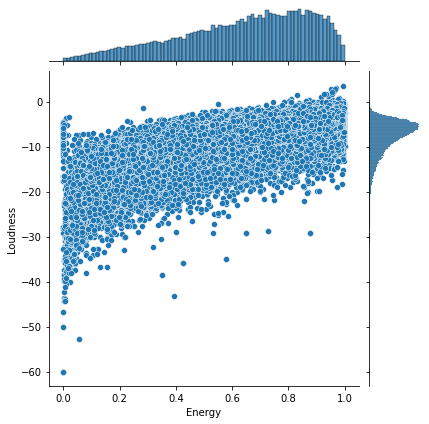

In [21]:
#A joint plot to draw a plot of two variables with bivariate and univariate graphs of Energy and Loudness
sns.jointplot(x="Energy", y="Loudness", data=song_data_values, height=6, kind="scatter")
#We see that Energy has a slight skew to the right which means we have more songs that have a higher energy level.
#On the right side we can see that the bars for loudness are skewed to the left. This shows that there are more louder songs in the dataset than quite.
#The bivariate graph shows a positive correlatiom, which indicates that the higher the energy a song has the louder the song is. 

# Quantitative EDA

In [22]:
#Mean is the average and reasonable summary of the data
np.mean(song_data_values)

Acousticness             0.266328
Danceability             0.575550
Duration            232444.772583
Energy                   0.638691
Instrumentalness         0.063012
Liveness                 0.254298
Loudness                -8.027157
Mode                     0.683040
Popularity              20.249111
Speechiness              0.122447
Tempo                  119.215978
TimeSignature            3.904274
Valence                  0.498472
dtype: float64

In [23]:
#Calculate the mean of  individual attributes based on PopularityLabel
song_data_values.groupby('popularityLabel').mean()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
popularityLabel,,,,,,,,,,,,,
Popular,0.233526,0.570381,238918.368760,0.663297,0.053349,0.245447,-7.434553,0.681207,35.658314,0.102204,120.568807,3.927184,0.488141
Unpopular,0.291936,0.579585,227390.879514,0.619481,0.070556,0.261208,-8.489798,0.684470,8.219249,0.138251,118.159835,3.886387,0.506537


In [24]:
#Computing Percentiles for Tempo and Loudness
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ttiles = np.percentile(song_data.Tempo, percentiles)
print("Tempo: ", ttiles)
ltiles = np.percentile(song_data.Loudness, percentiles)
print("Loudness: ", ltiles)

Tempo:  [ 72.754    94.366   118.862   139.821   181.58975]
Loudness:  [-18.41175  -9.852    -6.992    -5.166    -2.917  ]


In [25]:
#The standard deviation and the variance for Danceability
#Variance
variance = np.var(song_data.Danceability)
print(variance)
#Standard deviation
std = np.std(song_data.Danceability)
print(std)

0.028200488327341046
0.1679300102046714


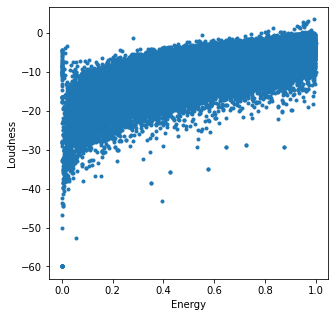

In [26]:
#Compare two properties of songs
plt.rcParams["figure.figsize"] = (5,5)
_ = plt.plot(song_data.Energy, song_data.Loudness, marker='.', linestyle='none')
_ = plt.xlabel('Energy')
_ = plt.ylabel('Loudness')
plt.show()
#It can be observed from the below graph that Energy and Loudness are positively corelated. 

In [27]:
#Computing the covariance to tell us how two quantities vary together
covariance_matrix = np.cov(song_data.Energy, song_data.Danceability)
print(covariance_matrix)

[[0.05415714 0.00506355]
 [0.00506355 0.02820067]]


In [28]:
#Pearson correlation coefficient (Pearson R) to view the covariance
song_data_values.corr()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
Acousticness,1.000000,-0.237465,-0.163021,-0.692831,-0.009606,0.008735,-0.567193,0.099790,-0.107450,0.000877,-0.168246,-0.199830,-0.167928
Danceability,-0.237465,1.000000,-0.023899,0.129568,-0.118227,-0.196645,0.182151,-0.090567,-0.007350,0.215217,-0.066985,0.229937,0.477983
Duration,-0.163021,-0.023899,1.000000,0.114669,0.126146,0.046760,0.100653,-0.044574,0.045612,-0.135556,0.053586,0.084519,-0.133814
Energy,-0.692831,0.129568,0.114669,1.000000,-0.009896,0.155784,0.757341,-0.090799,0.099233,0.039303,0.200692,0.206504,0.314099
Instrumentalness,-0.009606,-0.118227,0.126146,-0.009896,1.000000,-0.028392,-0.193167,-0.045724,-0.060611,-0.121779,0.018074,-0.027961,-0.169434
Liveness,0.008735,-0.196645,0.046760,0.155784,-0.028392,1.000000,0.006399,0.002512,-0.059284,0.155774,-0.005755,-0.004553,-0.028099
Loudness,-0.567193,0.182151,0.100653,0.757341,-0.193167,0.006399,1.000000,-0.051117,0.146934,-0.084604,0.164597,0.202261,0.207992
Mode,0.099790,-0.090567,-0.044574,-0.090799,-0.045724,0.002512,-0.051117,1.000000,-0.006457,-0.104442,0.015035,-0.021911,-0.025366
Popularity,-0.107450,-0.007350,0.045612,0.099233,-0.060611,-0.059284,0.146934,-0.006457,1.000000,-0.126140,0.044978,0.055191,-0.029403
Speechiness,0.000877,0.215217,-0.135556,0.039303,-0.121779,0.155774,-0.084604,-0.104442,-0.126140,1.000000,-0.044149,0.017370,0.160705


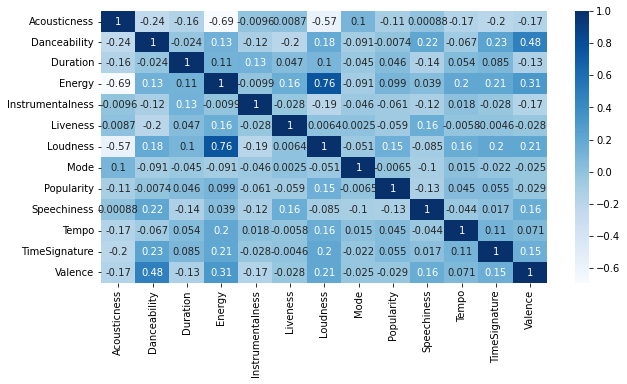

In [29]:
#Generate a heatmap for the correlation matrix to see how attributes correlate with each other
plt.figure(figsize=(10,5))
sns.heatmap(song_data_values.corr(), annot=True ,cmap='Blues')
plt.show()
#We see the Energy and Loudness have a strong correlation at 76%.
#We see that Danceability and Valence have a 48% correlation.

In [30]:
#Subset of the data and two sample t test for PopularityLabel
#t test will be on Danceability
#H0 or null: means are equal
#Ha or alternate: means not equal
song_data_values.groupby("popularityLabel")['popularityLabel'].describe()
song_pop = song_data.query('popularityLabel== "Popular"')
song_unpop = song_data.query('popularityLabel== "Unpopular"')
song_pop_dance = song_pop.Danceability
song_unpop_dance = song_unpop.Danceability
print(np.mean(song_pop_dance))
print(np.mean(song_unpop_dance))
stats.ttest_ind(song_pop_dance,song_unpop_dance)


0.5703808288553578
0.5795852458451123


Ttest_indResult(statistic=-10.708930686784024, pvalue=9.44393478518911e-27)

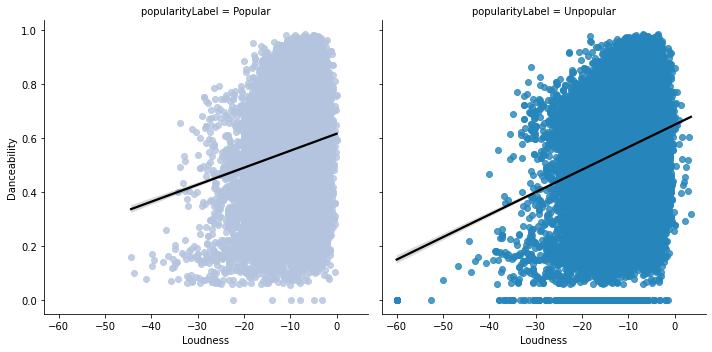

In [31]:
#LM plots for plotting Loudness vs Danceability
#The data set is divided into two subsets based on their popularity, and regression lines are mapped for both
sns.lmplot(x='Loudness', y='Danceability', data=song_data_values, col='popularityLabel', hue='popularityLabel', palette = 'PuBu', line_kws={'color': 'black'})
#We see there are more songs that are louder in the 'Unpopular' label compared to 'Popular' label. 